In [3]:
# include necessary libraries 
from numpy import zeros, linspace,pi,sin,cos ,array , exp 
import matplotlib.pyplot as plt

# User defined functions

In [10]:
#@title
# functions used 

def F(x : float ) -> float :
  return  x*pi**2 * cos(pi*x)

def A(x : float ) -> float : 
  return 1

def B(x : float) -> float : 
  return x*pi

def C(x : float ) -> float : 
  return  pi**2   


In [4]:
# Thomas algorithm implementation 

In [5]:

#@title
def ThomasMethod(a,b,c,d): 

    M = len(d)-1

    for m in range(1,M):
      temp = b[m] - a[m] * c[m-1]
      
      if (temp == 0) :   # to avoid zero division error  
        temp = 1e-9 
      c[m] = c[m] / temp
      d[m] = (d[m] - a[m] * d[m-1]) / temp
      a[m] = 0 
      b[m] = 1
      

    # Back-substitution

    x = zeros((len(d),1))  # to store solution 
    x[M] = d[M]
    for m in range(M-1,-1,-1): 
        x[m] = d[m] - c[m]*x[m+1]

    return x
  
#--------------------------------------------------------------------------------

In [6]:
# boundary value problem solver ->  bvp(A,B,C,F,xL,xR,uL,uR,M)

In [7]:
#@title
def bvp(A,B,C,F,xL,xR,uL,uR,M,temporal_domain_present=False):

  # boundry condition   
  x = linspace(xL,xR,M+1)
  h = (xR - xL)/M

  #Solve the system using Thomas Algorithm

  subdiag = zeros(M+1) 
  diag = zeros(M+1)      
  supdiag = zeros(M+1)
  RHS = zeros(M+1) #RHS : Right hand Side of system of equation

  RHS[0] = uL 
  RHS[M] = uR 
  diag[0] = diag[M] = 1.0 

  #fill entries of rows of matrix  from index= 1 to M-1  
  for i in range(1,M) : 
    a_i = A(x[i])  
    b_i = B(x[i])
    c_i = C(x[i])
    f_i = 0
    if (temporal_domain_present) :
      f_i = F(i)
    else : 
      f_i = F(x[i]) 

    subdiag[i] = (a_i/(h**2)) - (b_i)/(2*h) 
    diag[i] = -2*a_i/(h**2) + c_i 
    supdiag[i] =  a_i/(h**2) + b_i/(2*h) 
    RHS[i] = f_i 
  
  sol = ThomasMethod(subdiag,diag,supdiag,RHS)
  return sol 

In [12]:
# Plot solution

In [8]:
#@title
def actual_sol(x):
  y_true = sin(pi*x)
  return y_true 

def plot_solution( x, y) :
    figure,axis = plt.subplots(1,2,figsize=(15,5))
    y_true = actual_sol(x).reshape(-1)
    axis[0].plot(x,y,label = 'prediction')
    axis[0].plot(x,y_true,label = 'actual sol')
    axis[0].legend(loc='upper left')
    axis[0].title.set_text('Predicted Y')

    errors = abs(y_true-y)
    axis[1].plot(x,errors)
    axis[1].title.set_text('Error in prediction')


<br><br>
\begin{align}
&A(x)\frac{\partial^2 u(x)}{\partial x^2} + B(x)\frac{\partial u(x)}{\partial x} + C(x)u(x) = F(x) & &A(x)>0&  &B(x) !=0 &  
\end{align}
<br><br>

 ## Example 1
\begin{align}
& u(x) = sin(\pi x) &
& A(x) = 1 &
& B(x) = \pi &
& C(x) = \pi^2 &
& F(x) = \pi^2 * cos(\pi x) 
\end{align}

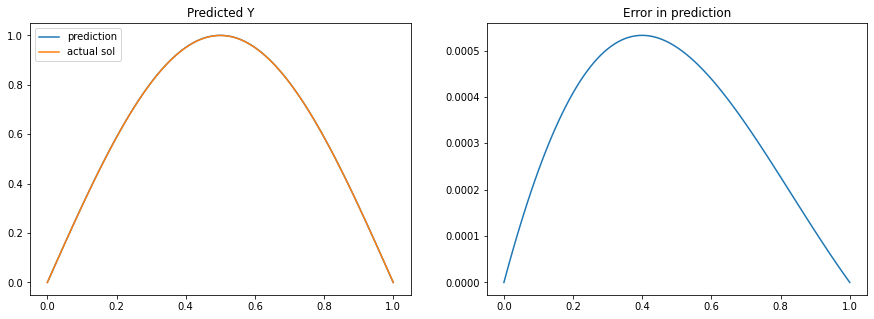

In [30]:
# Input parameters 
xL = 0
xR = 1
uL = 0 
uR = 0
M = 100
h = (xR-xL)/M
x = linspace(xL,xR,M+1)
sol = bvp(A,B,C,F,xL,xR,uL,uR,M)
sol = array(sol).reshape(-1)
plot_solution(x,sol)

In [ ]:
#@title

Thetas = linspace(0.1,0.9,10)
actual_solution = sin(pi*x)

def expected_error1(x,h,theta):   
  error_in_dy_xx = A(x)*((pi**2)*(h**2)/12)*sin(pi*(x+theta*h))
  return error_in_dy_xx

def expected_error2(x,h,theta1,theta2):
    error_in_dy_x  = (-pi*h/4)*B(x)*(sin(pi*(x + theta1*h)) - sin(pi*(x - theta2*h)))
    return  error_in_dy_x 

errors1 = []
for theta in Thetas :
    predicted_error = max(abs(expected_error1(x,h,theta)))
    errors1.append(predicted_error)

errors2  = []
for theta1 in Thetas :
  temp_errors = [] 
  for theta2 in Thetas : 
    predicted_error = max(abs(expected_error2(x,h,theta1,theta2)))
    temp_errors.append(predicted_error)
  temp_errors = array(temp_errors)
  errors2.append(max(abs(temp_errors)))

errors = array(errors1) + array(errors2) 

actual_error = abs(actual_sol-sol)

print("Actual Error :", max(actual_error))
print("Expected Error : ",min(errors))


Actual Error : 0.0013343859678922598
Expected Error :  0.0008573101372070918


**[ Case 1 ]**  -->  A(x) = x,  B(x)=π ,    C(x) = x*π^2 ,   F(x) = π^2 cos(πx) 

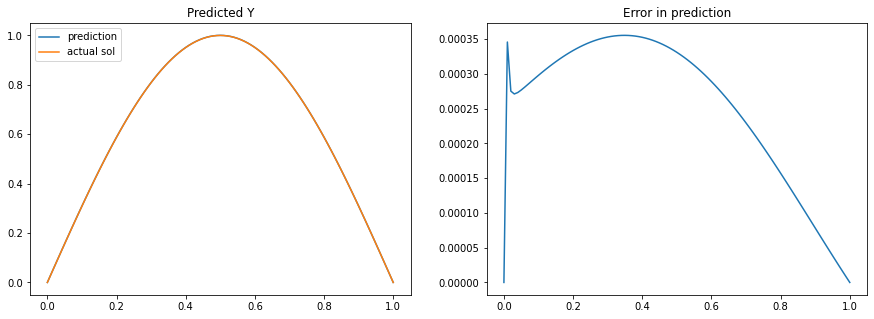

In [9]:
# Input parameters 
xL = 0
xR = 1
uL = 0 
uR = 0
M = 100
h = (xR-xL)/M
x = linspace(xL,xR,M+1)
sol = bvp(A,B,C,F,xL,xR,uL,uR,M)
sol = array(sol).reshape(-1)
plot_solution(x,sol)

**[ Case 2 ]**  -->  A(x) = 1,  B(x)=πx ,    C(x) = π^2 ,   F(x) = x*π^2 cos(πx) 

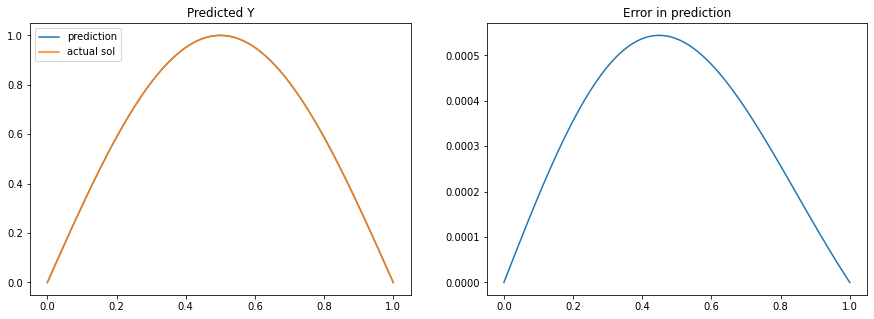

In [11]:
# Input parameters 
xL = 0
xR = 1
uL = 0 
uR = 0
M = 100
h = (xR-xL)/M
x = linspace(xL,xR,M+1)
sol = bvp(A,B,C,F,xL,xR,uL,uR,M)
sol = array(sol).reshape(-1)
plot_solution(x,sol)

#### Cross checking solution

## Example 2

\begin{align}
& u(x) = sin(\pi x) &
& A(x) = 2 &
& B(x) = -3\pi &
& C(x) = 2\pi^2 &
& F(x) = -3\pi^2 * cos(\pi x) 
\end{align}

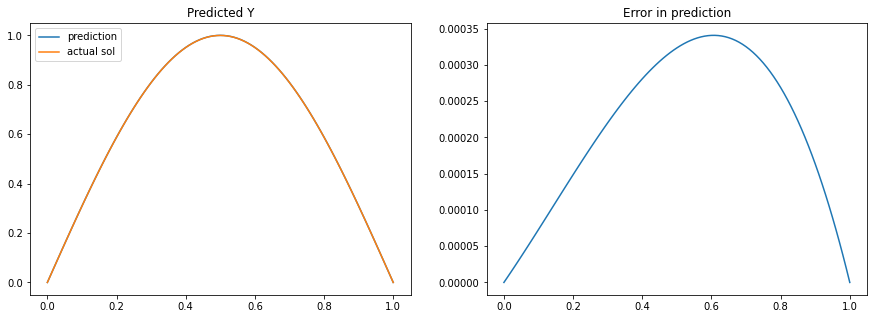

## Example 3 

\begin{align}
& u(x) = x^3 &
& A(x) = 1 &
& B(x) = -2 &
& C(x) = 2 &
& F(x) = 2(x-1)^3 + 2 
\end{align}


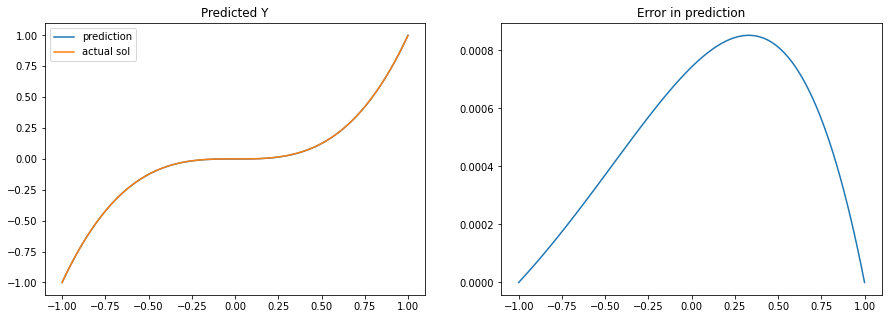

In [ ]:
# Input parameters 
xL = -1
xR = 1
uL = -1 
uR = 1
M = 100
h = (xR-xL)/M
x = linspace(xL,xR,M+1)
sol = bvp(A,B,C,F,xL,xR,uL,uR,M)
sol = array(sol).reshape(-1)
plot_solution(x,sol)

## Black Scholes Model

In [17]:
#@title
# functions used 

time = 0 

def F1(i : int ) -> float :
  if (time == 0) : 
    return  (1/k)*U[time][i]
  else : 
    return (2/k)*U[time][i] - (1/(2*k))*U[time-1][i] 

def A1(x : float ) -> float : 
  return a1

def B1(x : float) -> float : 
  return b1 

def C1(x : float ) -> float : 
  return  c1 


In [24]:
# some intitial conditions 

time = 0 

sigma = 0.2
r = 0.06
T = 1
K = 5
xL = -2
xR = 2
M = 32
N = 16

x = linspace(xL,xR, M+1)
t = linspace(0,T,N+1)

h = (xR - xL)/M 
k = T/N 


# some calculations 

a1 = (-1/2)*sigma**2   # coefficient of d2_V/dx_2
b1 = (1/2)*sigma**2 - r 
c1 = r + (1/k)

# solution matrix U 

U = zeros((N+1,M+1))

for i in range(M+1):
  tmp = K*(exp(x[i])-1 )

  if (tmp>0):
        U[0][i] = tmp
  else : 
        U[0][i] = 0 

for j in range(1,N+1):
  if (j==2) : 
    c1 = c1 + 0.5/k
  uL = U[j-1][0]
  uR = U[j-1][M]
  U[j][0:] = bvp(A1,B1,C1,F1,xL,xR,uL,uR,M,True).reshape(-1)
  time += 1 









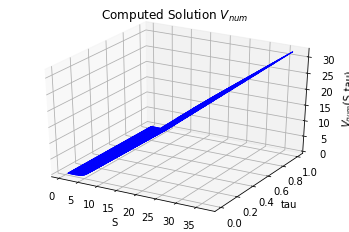

In [25]:
S = K*exp(x)
S = S.reshape(len(S),1)
tau = T-t[::-1] # Original financial variables
Vnum = U[::-1,:].T

plt.clf() # clear existing figures
Tt, Ss = meshgrid(tau, S)
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot_surface(Ss, Tt, Vnum, color='red',alpha = 0.5, linewidth=1, edgecolors='blue')
plt.axis('tight')
ax.set_xlabel('S')
ax.set_ylabel('tau')
ax.set_zlabel('$V_{num}$(S,tau)');
ax.set_title('Computed Solution $V_{num}$');


In [26]:
V = zeros((len(S),len(tau))) # Initialization of the option value
y = S-K
Y = append(arr=zeros((len(y),1)),values=y,axis=1) #Adding column of 1 to the matrix
V[:,-1] = max(Y,axis=1) # Option value at the maturity date T
## option value at (S(i),tau(n)), i =1,2,...,Nx+1, n = 1,2,...,Nt.
for i in range(0,len(x)):
    for n in range(len(t)-2,-1,-1): 
        d1 = (log(S[i]/K) + (r+0.5*sigma**2)*(T-tau[n]))/(sigma*sqrt(T-tau[n]))
        d2 = d1-sigma*sqrt(T-tau[n])
        # V[i,n] = norm.cdf(d1)- K*exp(-r*(T-tau[n]))*norm.cdf(d2)
        V[i,n] = S[i]*norm.cdf(d1) - K*exp(-r*(T-tau[n]))*norm.cdf(d2)


In [27]:
print(V.shape, Vnum.shape)

Errors = abs(V - Vnum)


(33, 17) (33, 17)


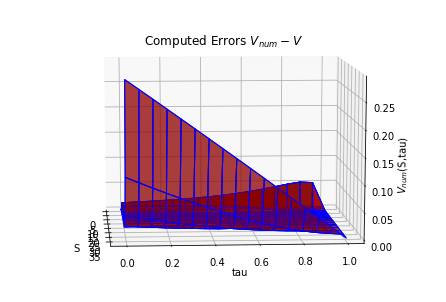

In [28]:
# Create a figure and a 3D Axes

fig = plt.figure()
ax = Axes3D(fig)

# init function initializes the data
def init():
    # Plot the surface.
    ax.plot_surface(Ss, Tt, Errors, color='red',alpha = 0.5,
                    linewidth=1, edgecolors='blue')
    plt.axis('tight')
    ax.set_xlabel('S')
    ax.set_ylabel('tau')
    ax.set_zlabel('$V_{num}$(S,tau)');
    ax.set_title('Computed Errors $V_{num} - V$');
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit = False) 
# The blit parameter ensures that only those pieces of the plot are re-drawn which have been changed
# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim